<a href="https://colab.research.google.com/github/Ranjan000001/House_Price_Prediction/blob/main/House_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jacopoferretti/urban-house-prices-in-europe")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'urban-house-prices-in-europe' dataset.
Path to dataset files: /kaggle/input/urban-house-prices-in-europe


In [5]:
import os
path = "/kaggle/input/urban-house-prices-in-europe"

print(os.listdir(path))

['dp2015-13_Dataset.xls']


# **Import Libeares**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# **EDA**

In [7]:
# loading data and info and first 5 columns
dataset=pd.read_excel(os.path.join(path,'dp2015-13_Dataset.xls'))

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 184 entries, City to ECM_Cost2010
dtypes: float64(172), int64(8), object(4)
memory usage: 72.0+ KB


,City,City_Eng,City_Short,NAds,Price_Median,Price_Mean,Area_Median,Area_Mean,Room_Median,Room_Mean,...,Longitude_deg,Longitude_min,Longitude_sec,Lat,Lon,Liveability2010,Mercer_Qual_Liv2011,Mercer_Per_Safe2011,ECM2010,ECM_Cost2010
0,Amsterdam,Amsterdam,AMS,9520,3419.972640,3426.322536,71.0,75.299475,3.0,2.838340,...,4,54,0.0,52.383333,4.900000,93.0,12.0,17.0,0.25,0.21
1,Athina,Athens,ATH,10782,2064.004096,2109.106052,76.0,77.163884,3.0,2.870339,...,23,43,0.0,38.000000,23.716667,81.0,NaN,NaN,0.02,0.64
2,Barcelona,Barcelona,BCN,5479,3140.000000,3267.621000,77.0,80.772769,3.0,2.794853,...,2,11,0.0,41.383333,2.183333,91.0,40.0,NaN,0.27,0.63
3,Beograd,Belgrade,BEG,12797,1416.666667,1466.117265,58.0,60.236618,2.0,2.325467,...,20,28,0.0,44.816667,20.466667,67.0,NaN,NaN,NaN,NaN
4,Berlin,Berlin,BER,16772,2150.338326,2313.968040,75.0,82.349263,2.5,2.579394,...,13,17,51.0,52.522222,13.297500,94.0,17.0,36.0,0.24,0.39


In [8]:
# null duplicated
dataset.isnull().sum()

# dataset.duplicated().sum()  # is 0

,0
City,0
City_Eng,0
City_Short,0
NAds,0
Price_Median,0
...,...
Liveability2010,19
Mercer_Qual_Liv2011,25
Mercer_Per_Safe2011,34
ECM2010,23


In [9]:

















































































































# removing columns having more then 40% null
df = dataset.copy() # for safty
dataset = dataset.loc[:, dataset.isnull().mean() <= 0.4]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  50 non-null     object 
 1   City_Eng              50 non-null     object 
 2   City_Short            50 non-null     object 
 3   NAds                  50 non-null     int64  
 4   Price_Median          50 non-null     float64
 5   Price_Mean            50 non-null     float64
 6   Area_Median           50 non-null     float64
 7   Area_Mean             50 non-null     float64
 8   Room_Median           50 non-null     float64
 9   Room_Mean             50 non-null     float64
 10  Euro_area             50 non-null     int64  
 11  EU                    50 non-null     int64  
 12  Population            50 non-null     int64  
 13  City_Area             50 non-null     float64
 14  Density               50 non-null     float64
 15  GDP_PC                50 

In [10]:
# filling null cells
# categorical
dataset["CITIES"].fillna(method='bfill', inplace=True)
# numerical
for col in dataset.select_dtypes(include=np.number):
  dataset[col].fillna(method='ffill', inplace=True)
  dataset[col].fillna(method='bfill', inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  50 non-null     object 
 1   City_Eng              50 non-null     object 
 2   City_Short            50 non-null     object 
 3   NAds                  50 non-null     int64  
 4   Price_Median          50 non-null     float64
 5   Price_Mean            50 non-null     float64
 6   Area_Median           50 non-null     float64
 7   Area_Mean             50 non-null     float64
 8   Room_Median           50 non-null     float64
 9   Room_Mean             50 non-null     float64
 10  Euro_area             50 non-null     int64  
 11  EU                    50 non-null     int64  
 12  Population            50 non-null     int64  
 13  City_Area             50 non-null     float64
 14  Density               50 non-null     float64
 15  GDP_PC                50 

<Figure size 1000x600 with 0 Axes>

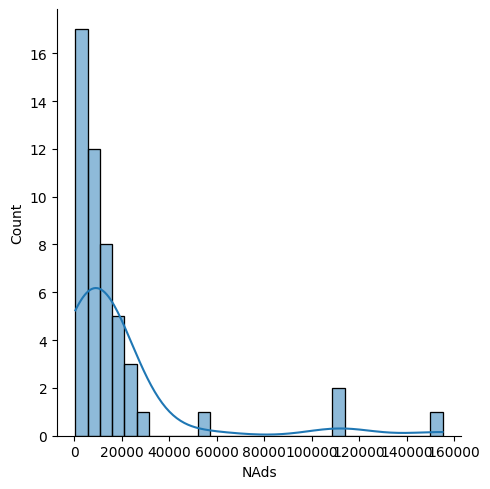

<Figure size 1000x600 with 0 Axes>

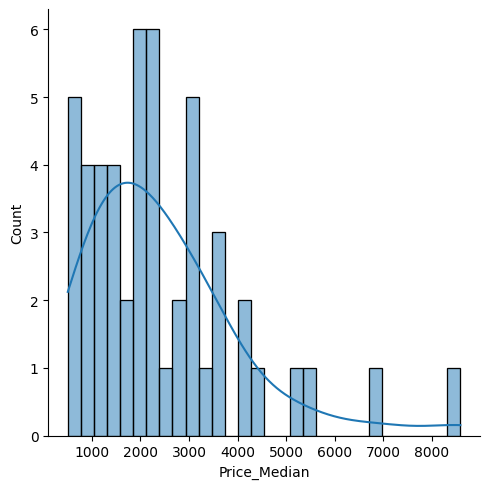

<Figure size 1000x600 with 0 Axes>

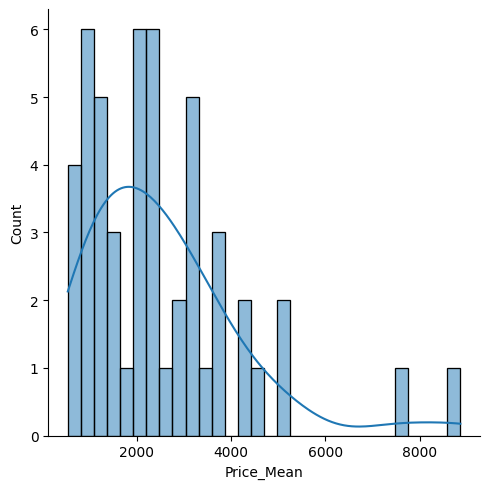

<Figure size 1000x600 with 0 Axes>

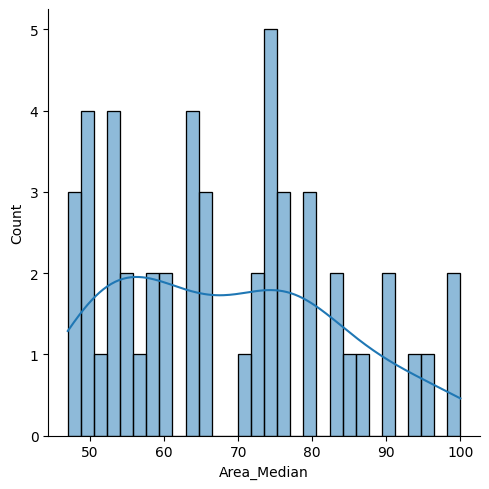

<Figure size 1000x600 with 0 Axes>

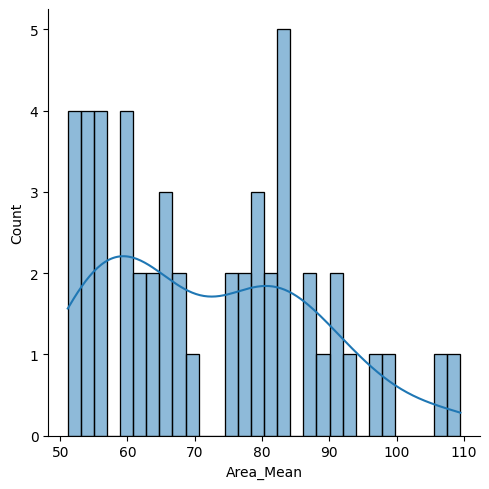

<Figure size 1000x600 with 0 Axes>

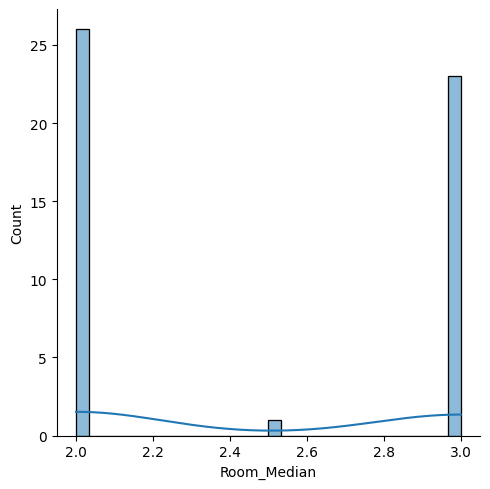

<Figure size 1000x600 with 0 Axes>

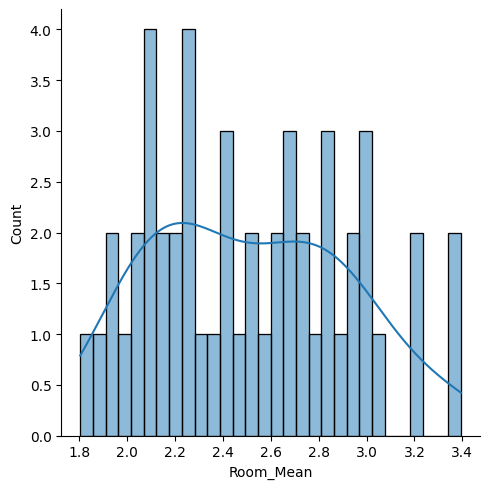

<Figure size 1000x600 with 0 Axes>

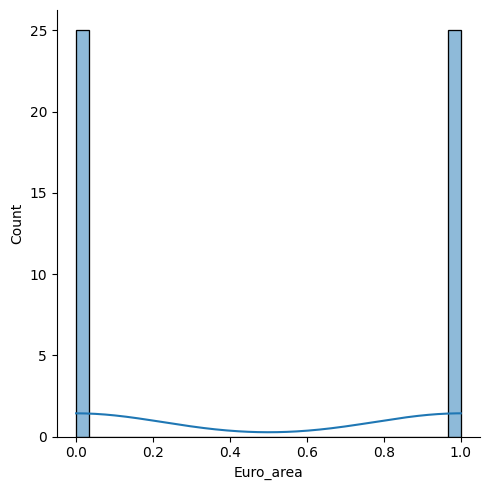

<Figure size 1000x600 with 0 Axes>

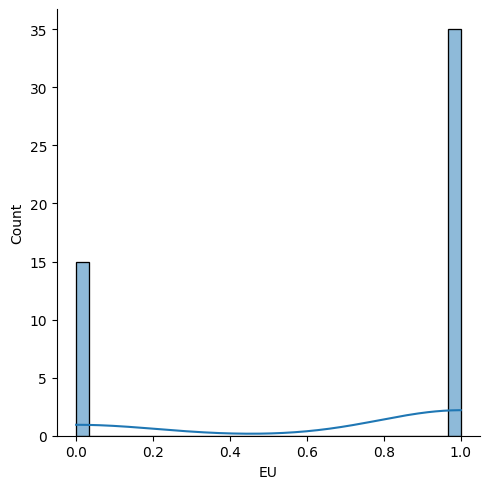

<Figure size 1000x600 with 0 Axes>

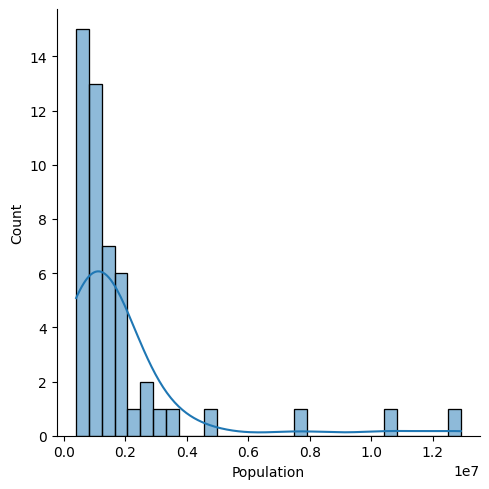

<Figure size 1000x600 with 0 Axes>

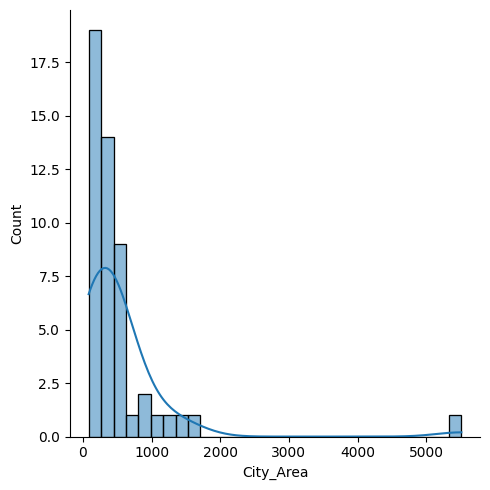

<Figure size 1000x600 with 0 Axes>

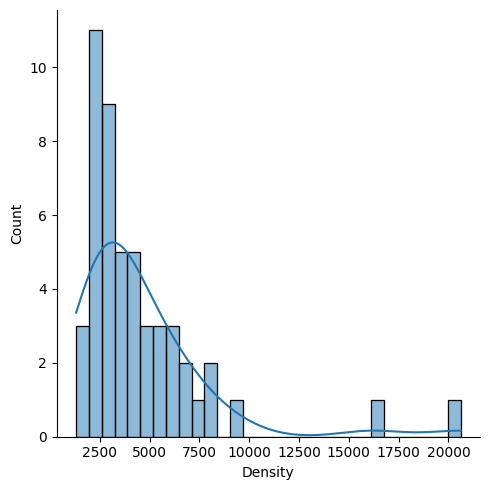

<Figure size 1000x600 with 0 Axes>

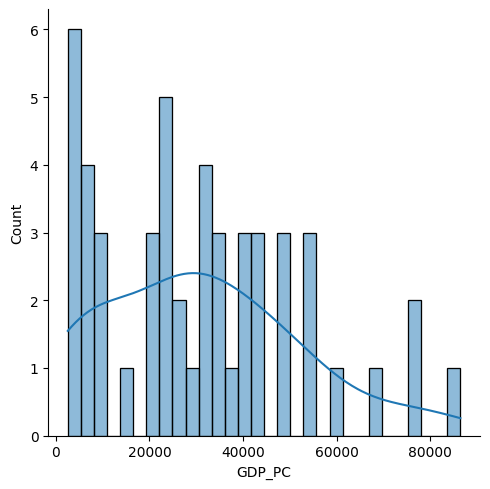

<Figure size 1000x600 with 0 Axes>

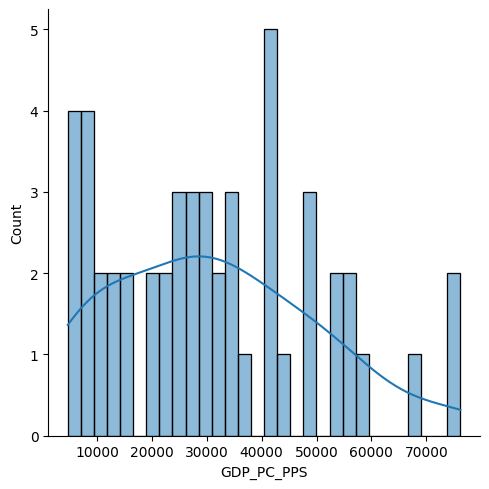

<Figure size 1000x600 with 0 Axes>

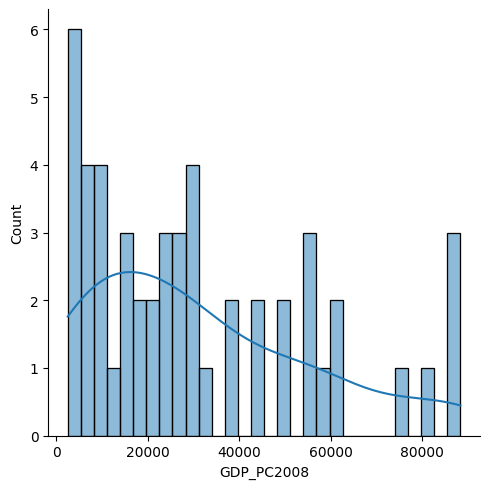

<Figure size 1000x600 with 0 Axes>

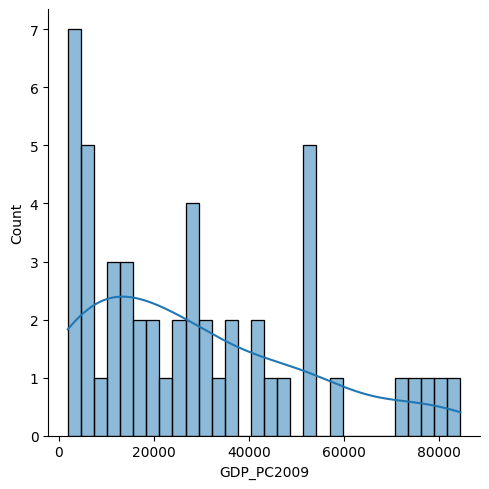

<Figure size 1000x600 with 0 Axes>

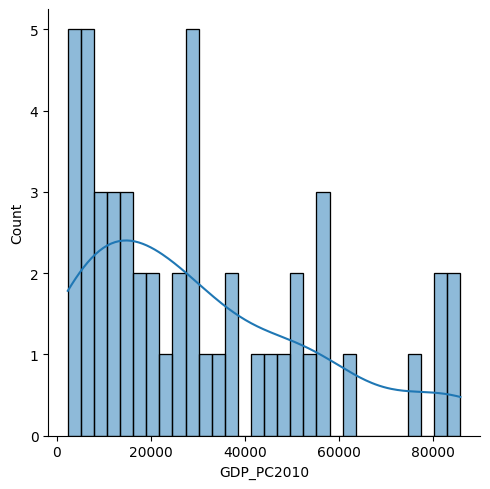

<Figure size 1000x600 with 0 Axes>

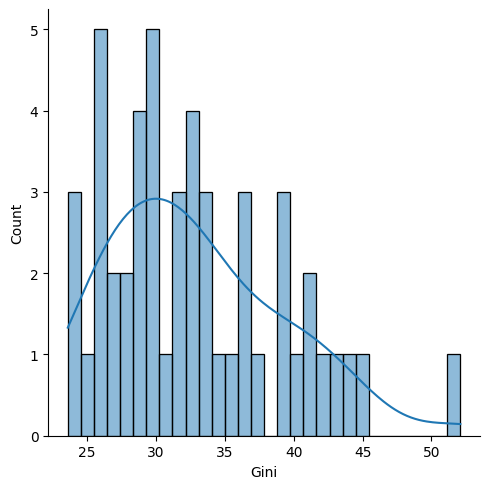

<Figure size 1000x600 with 0 Axes>

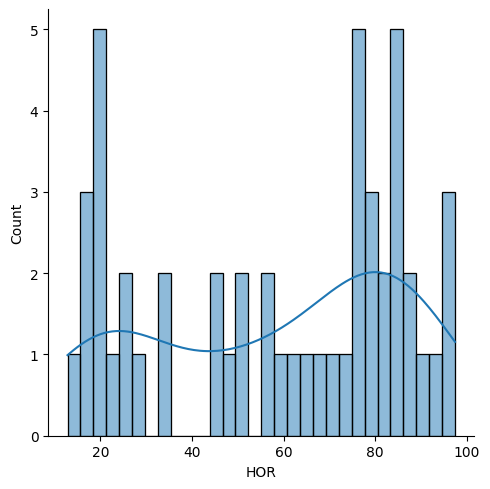

<Figure size 1000x600 with 0 Axes>

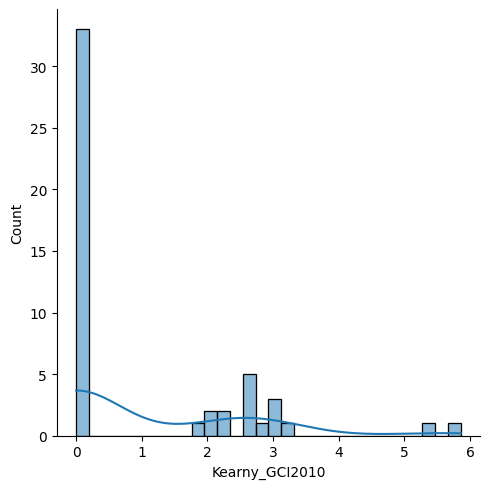

<Figure size 1000x600 with 0 Axes>

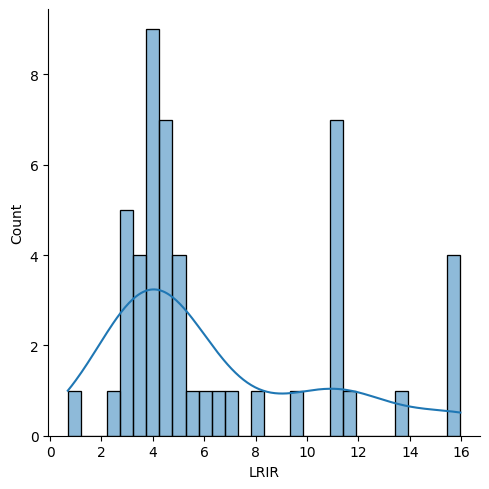

<Figure size 1000x600 with 0 Axes>

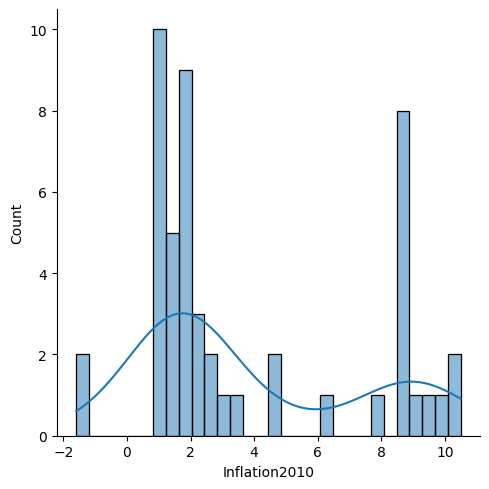

<Figure size 1000x600 with 0 Axes>

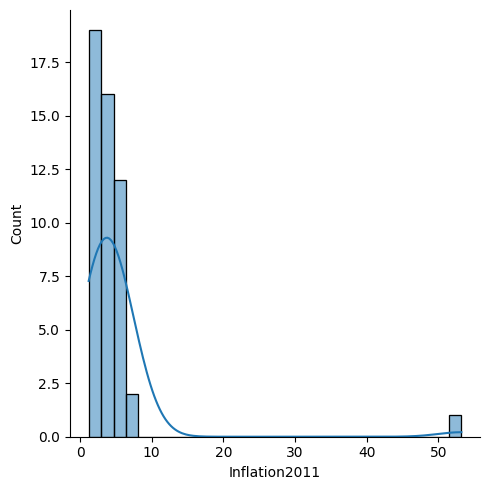

<Figure size 1000x600 with 0 Axes>

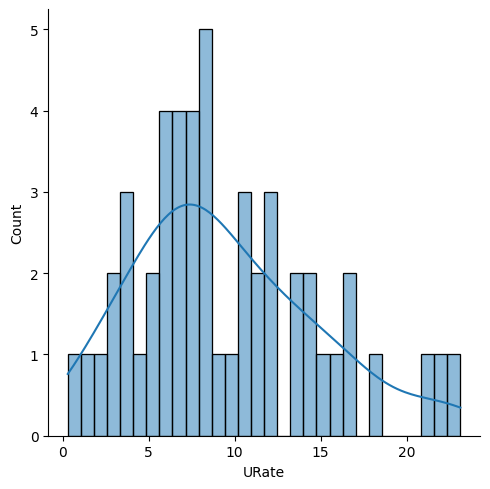

<Figure size 1000x600 with 0 Axes>

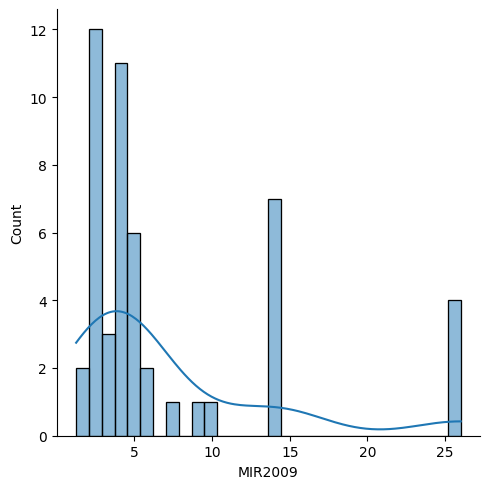

<Figure size 1000x600 with 0 Axes>

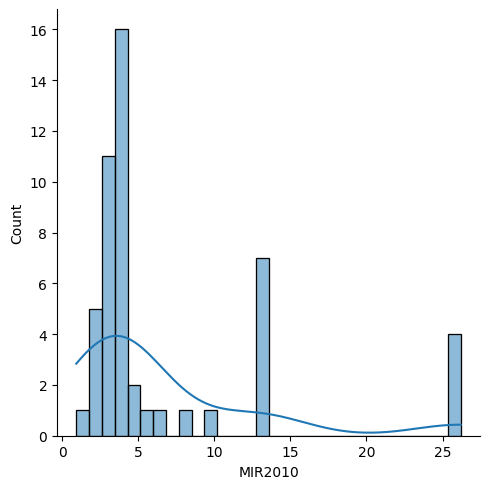

<Figure size 1000x600 with 0 Axes>

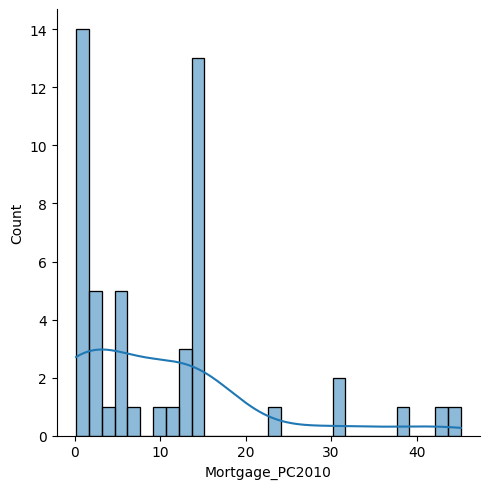

<Figure size 1000x600 with 0 Axes>

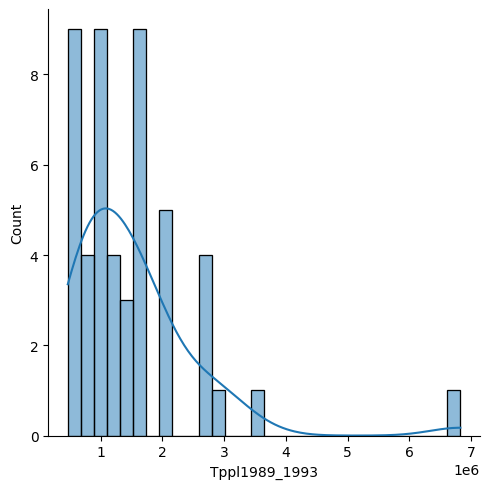

<Figure size 1000x600 with 0 Axes>

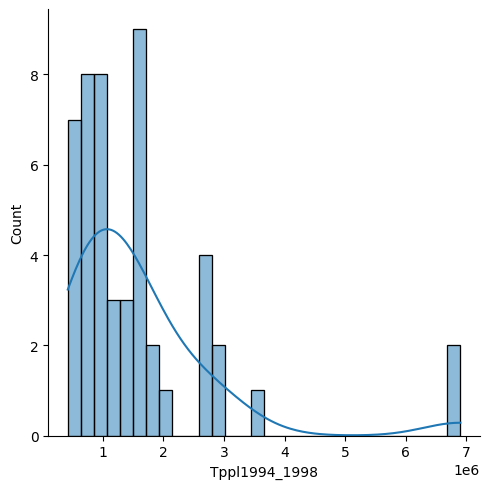

<Figure size 1000x600 with 0 Axes>

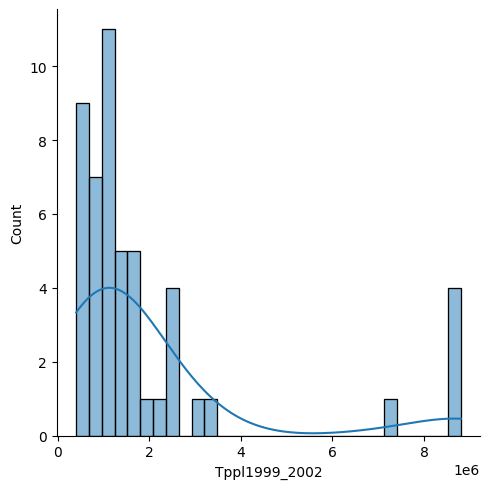

<Figure size 1000x600 with 0 Axes>

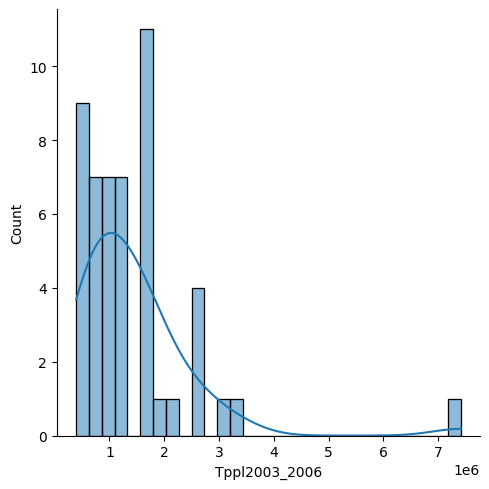

<Figure size 1000x600 with 0 Axes>

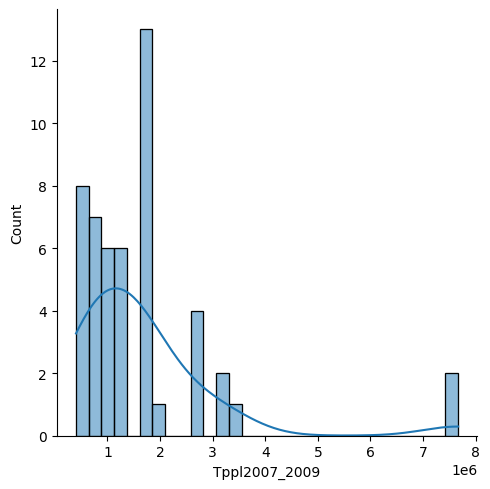

<Figure size 1000x600 with 0 Axes>

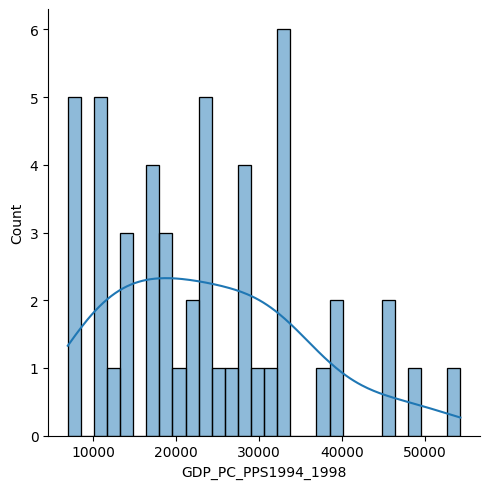

<Figure size 1000x600 with 0 Axes>

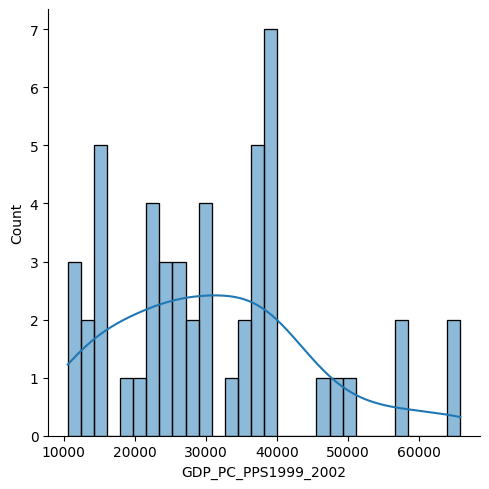

<Figure size 1000x600 with 0 Axes>

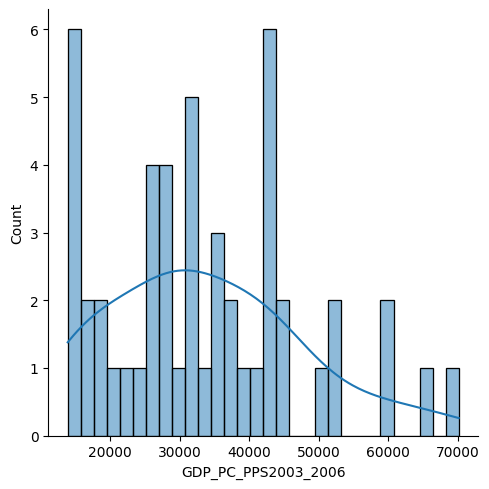

<Figure size 1000x600 with 0 Axes>

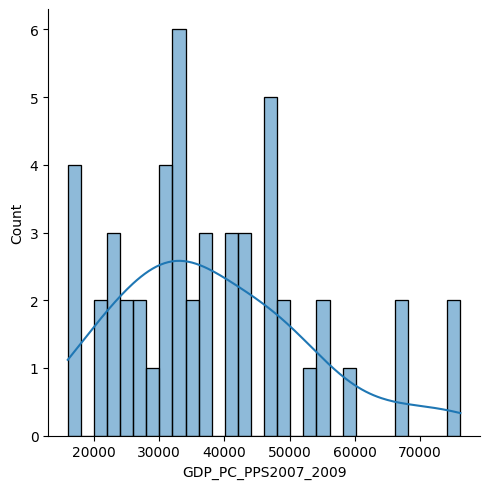

<Figure size 1000x600 with 0 Axes>

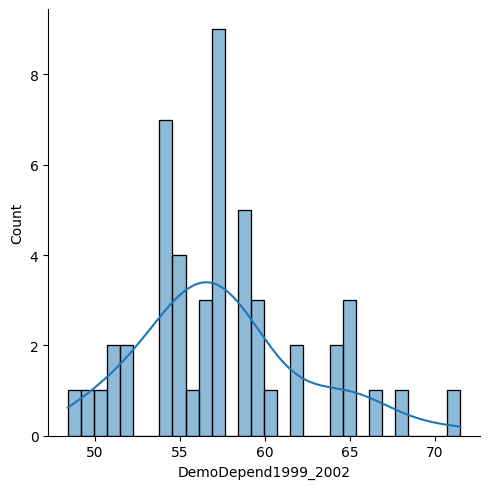

<Figure size 1000x600 with 0 Axes>

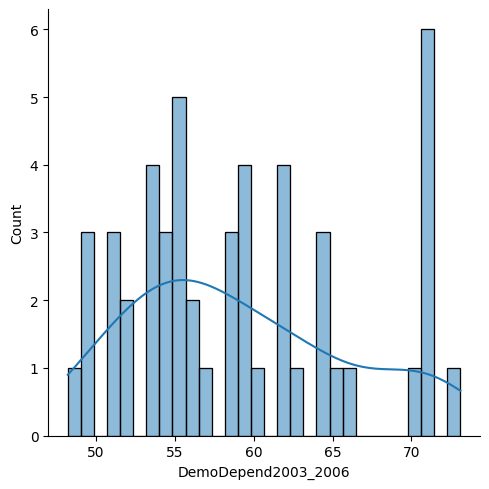

<Figure size 1000x600 with 0 Axes>

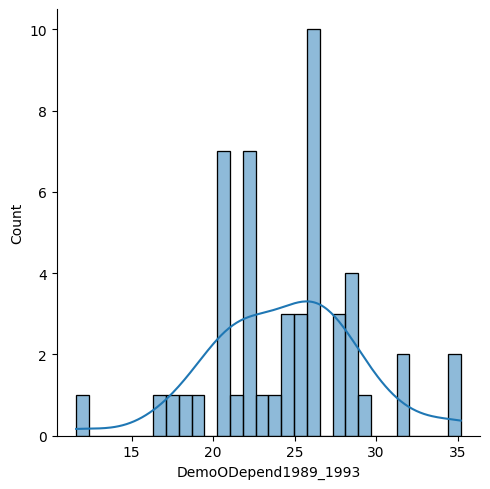

<Figure size 1000x600 with 0 Axes>

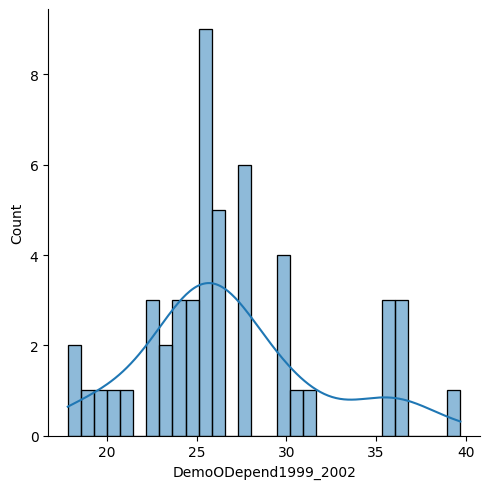

<Figure size 1000x600 with 0 Axes>

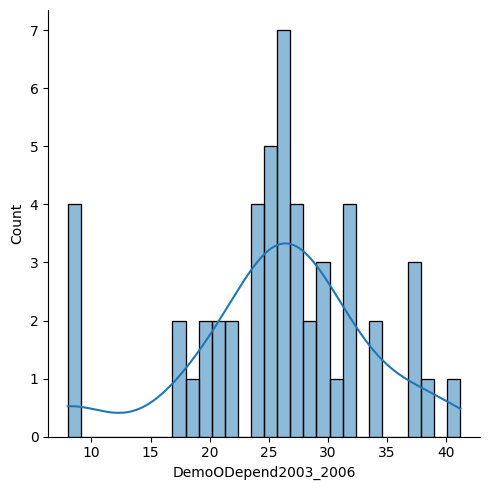

<Figure size 1000x600 with 0 Axes>

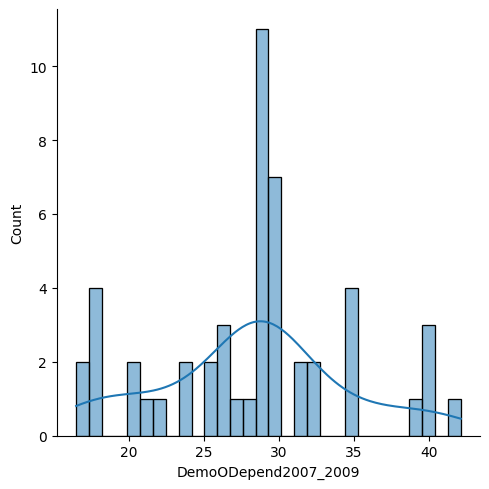

<Figure size 1000x600 with 0 Axes>

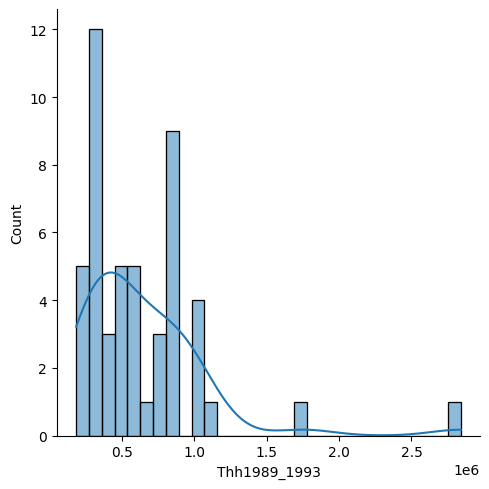

<Figure size 1000x600 with 0 Axes>

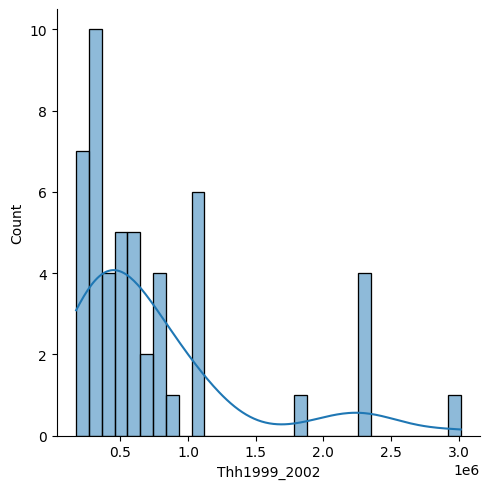

<Figure size 1000x600 with 0 Axes>

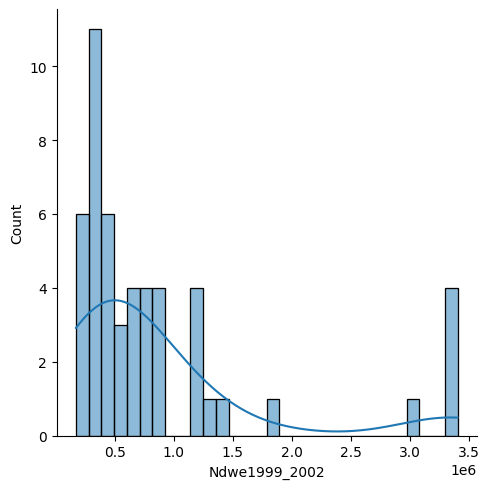

<Figure size 1000x600 with 0 Axes>

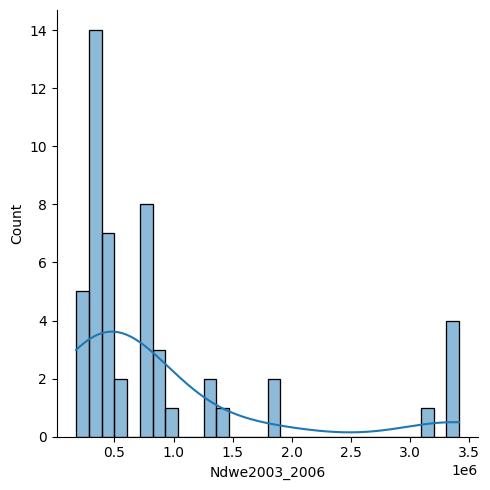

<Figure size 1000x600 with 0 Axes>

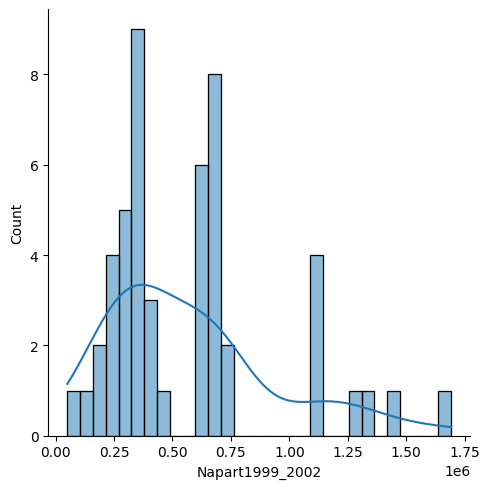

<Figure size 1000x600 with 0 Axes>

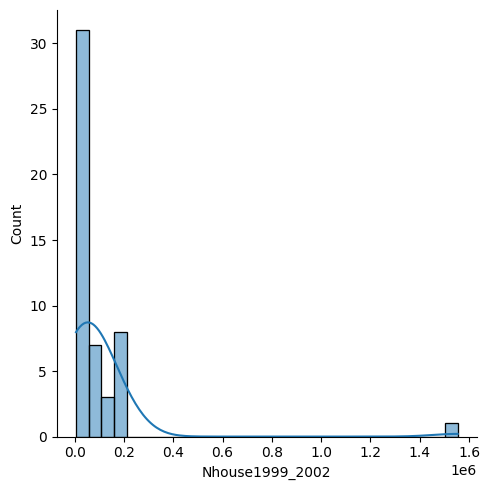

<Figure size 1000x600 with 0 Axes>

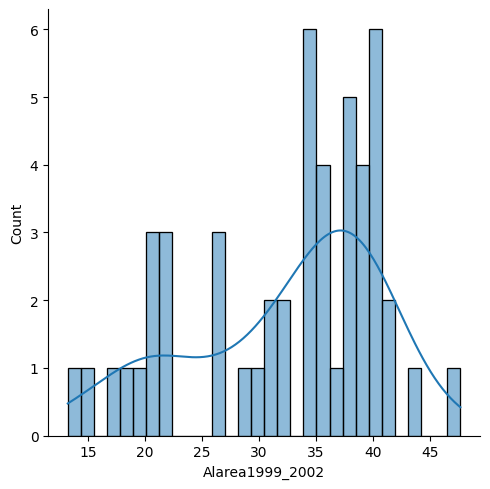

<Figure size 1000x600 with 0 Axes>

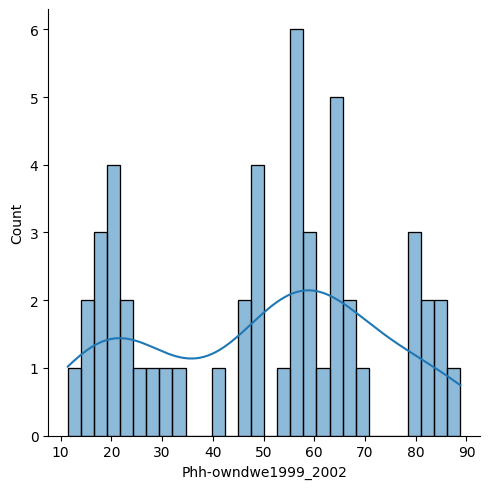

<Figure size 1000x600 with 0 Axes>

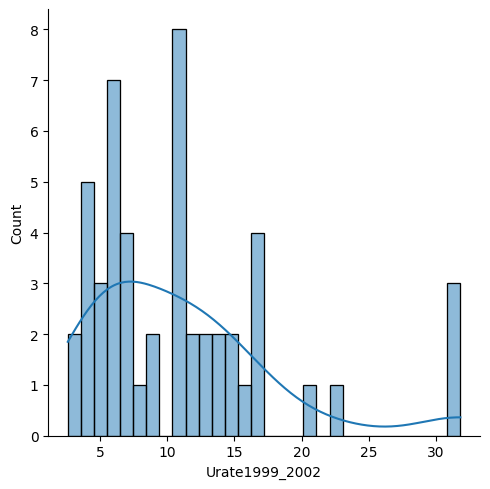

<Figure size 1000x600 with 0 Axes>

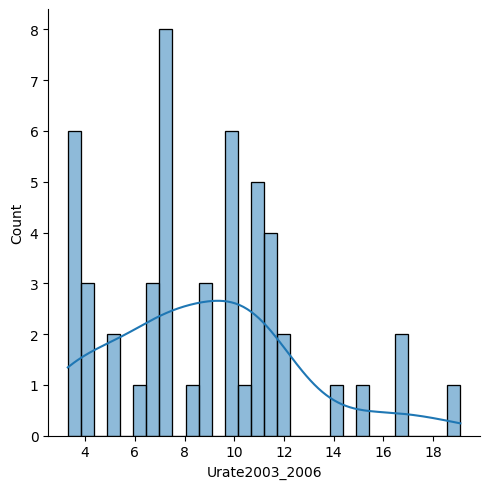

<Figure size 1000x600 with 0 Axes>

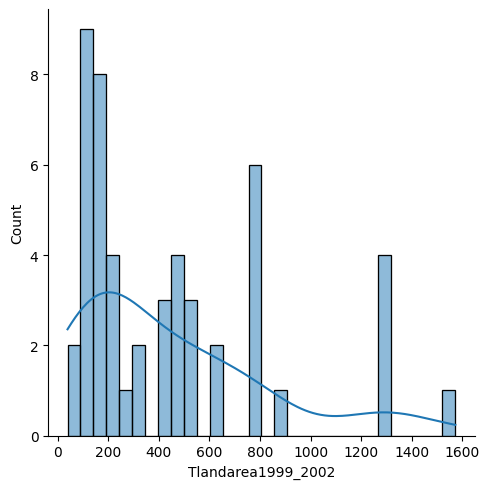

<Figure size 1000x600 with 0 Axes>

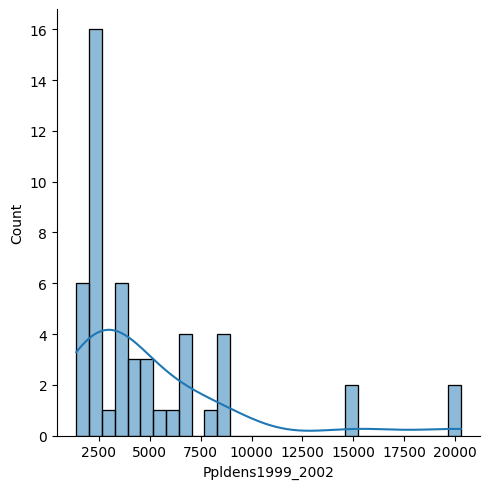

<Figure size 1000x600 with 0 Axes>

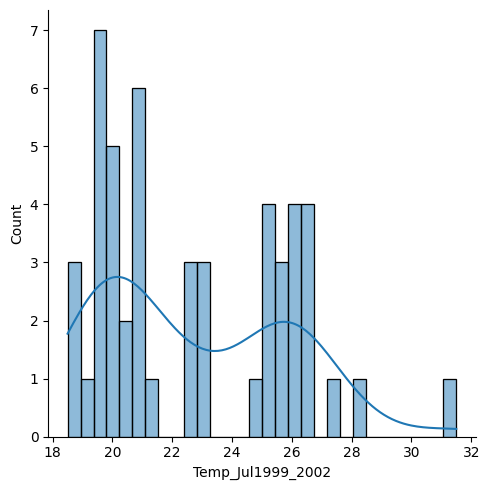

<Figure size 1000x600 with 0 Axes>

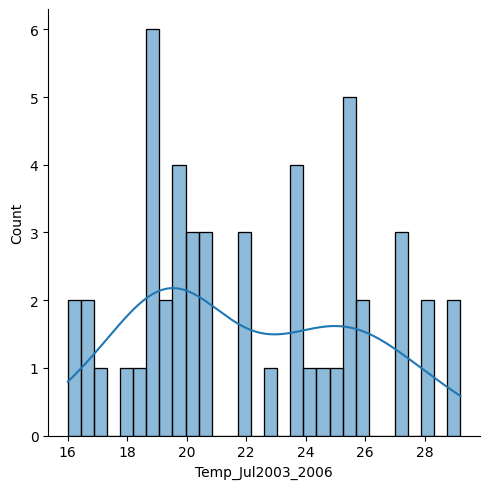

<Figure size 1000x600 with 0 Axes>

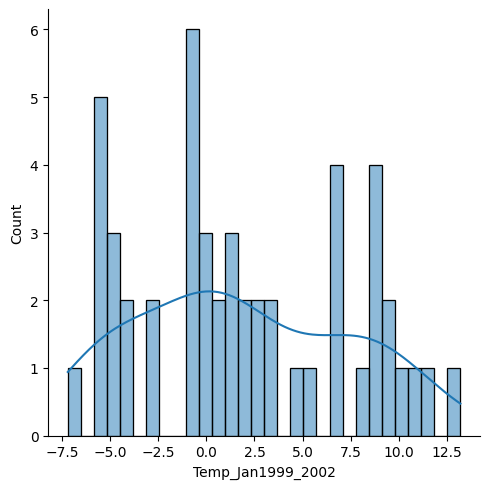

<Figure size 1000x600 with 0 Axes>

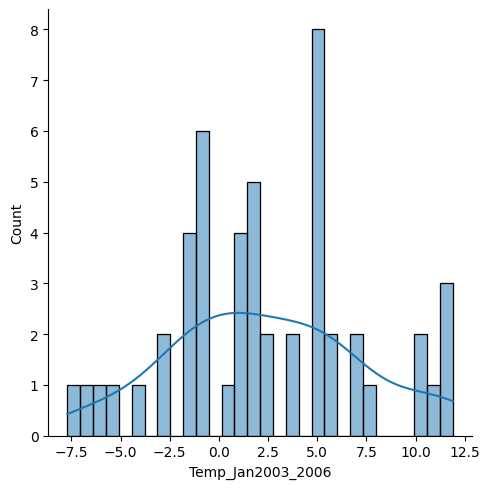

<Figure size 1000x600 with 0 Axes>

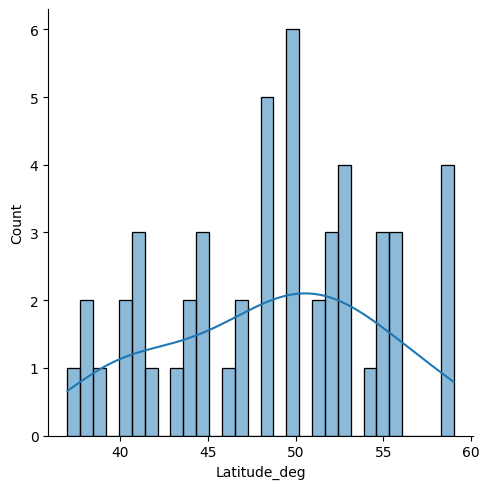

<Figure size 1000x600 with 0 Axes>

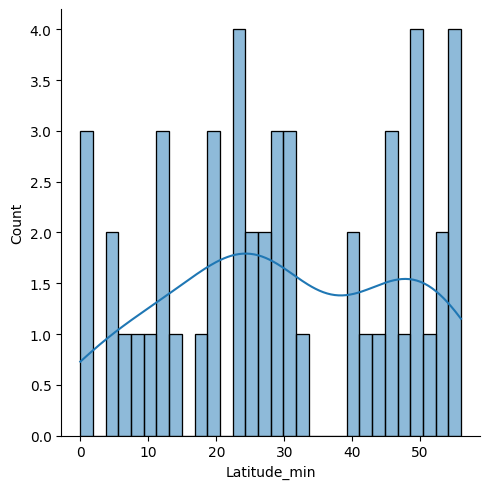

<Figure size 1000x600 with 0 Axes>

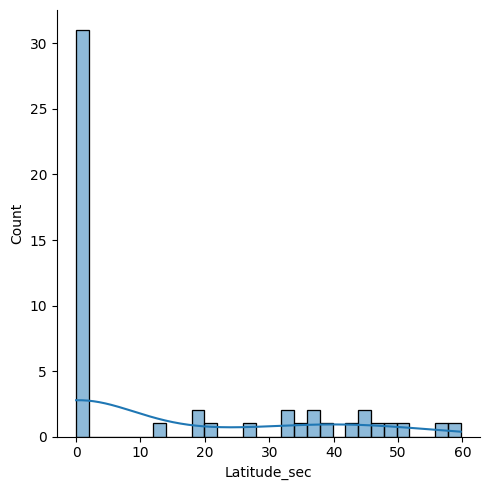

<Figure size 1000x600 with 0 Axes>

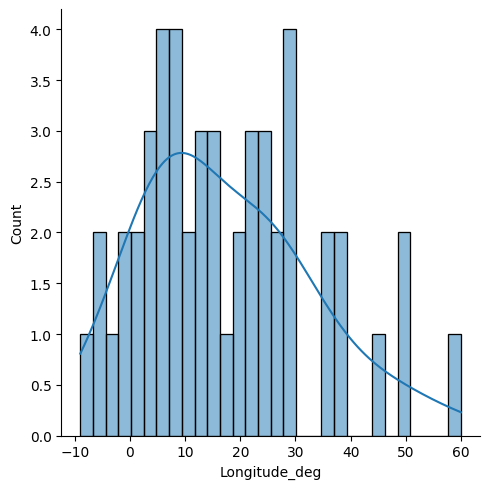

<Figure size 1000x600 with 0 Axes>

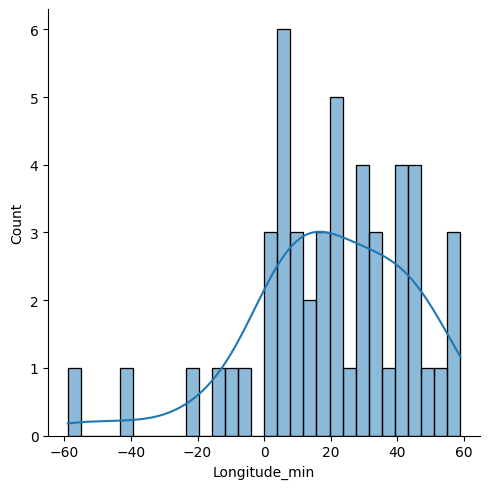

<Figure size 1000x600 with 0 Axes>

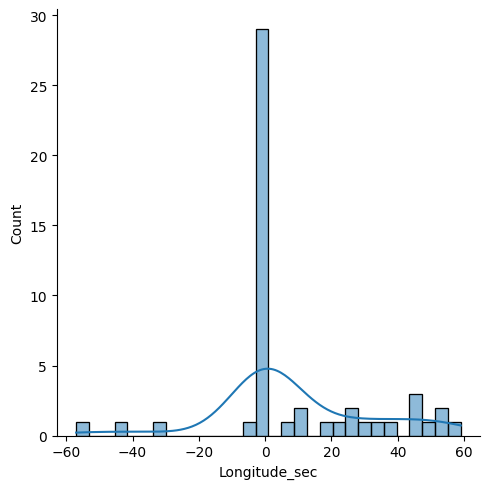

<Figure size 1000x600 with 0 Axes>

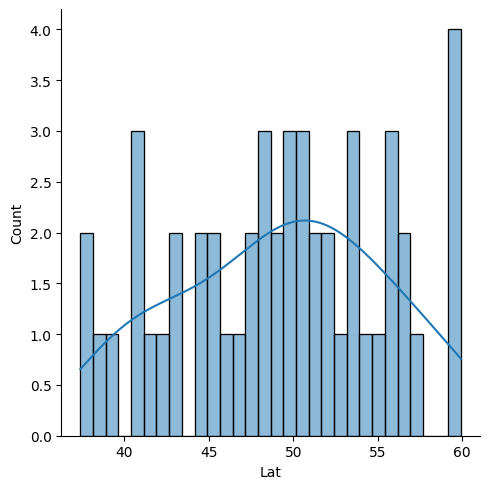

<Figure size 1000x600 with 0 Axes>

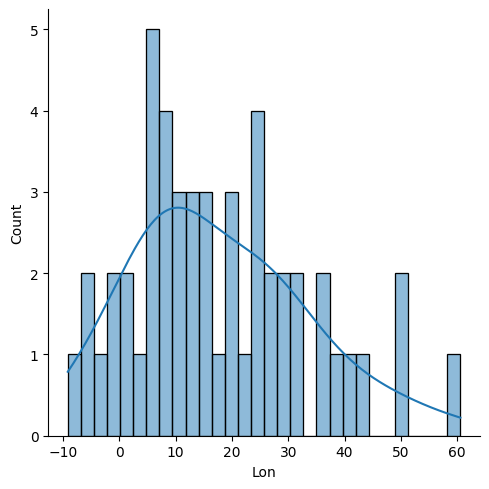

<Figure size 1000x600 with 0 Axes>

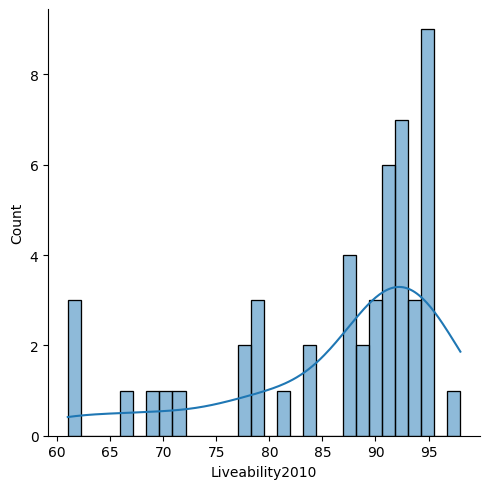

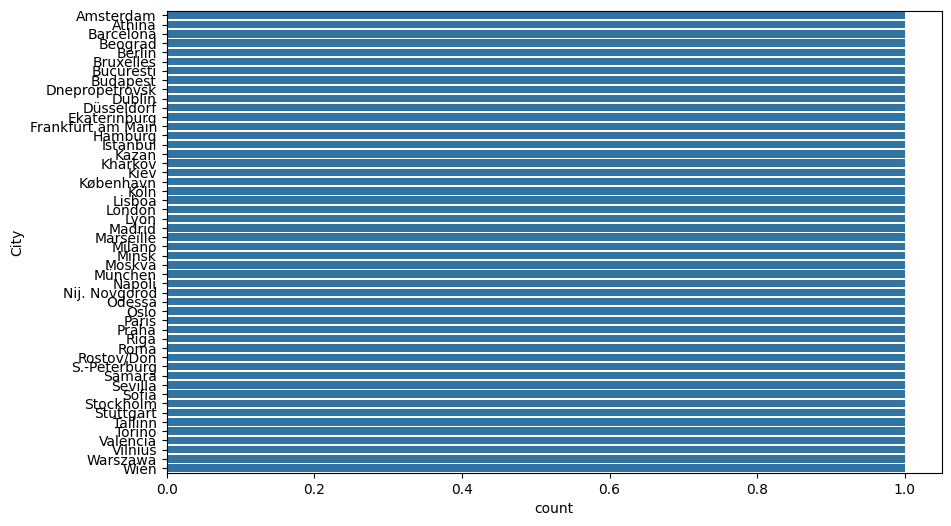

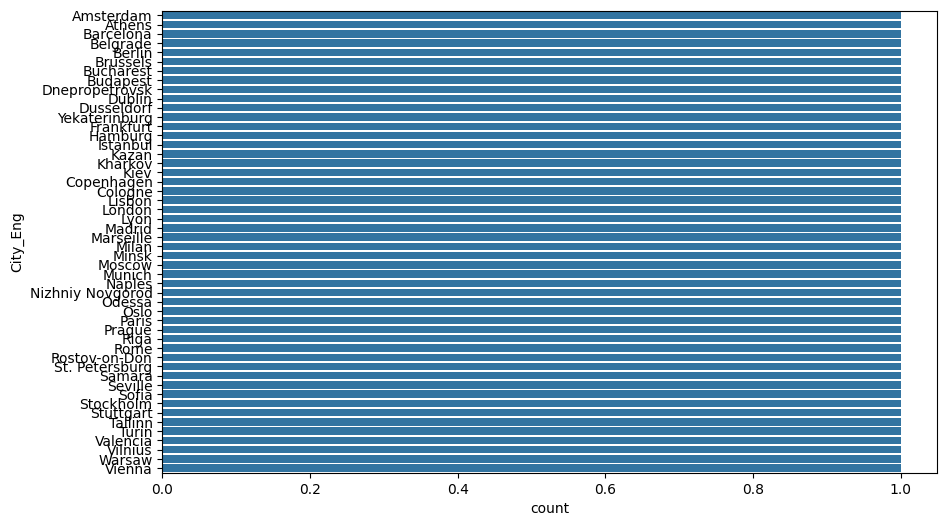

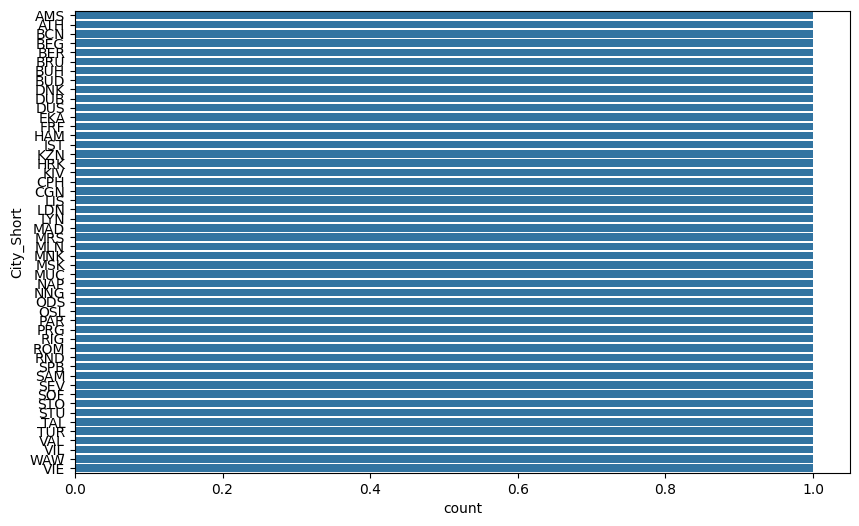

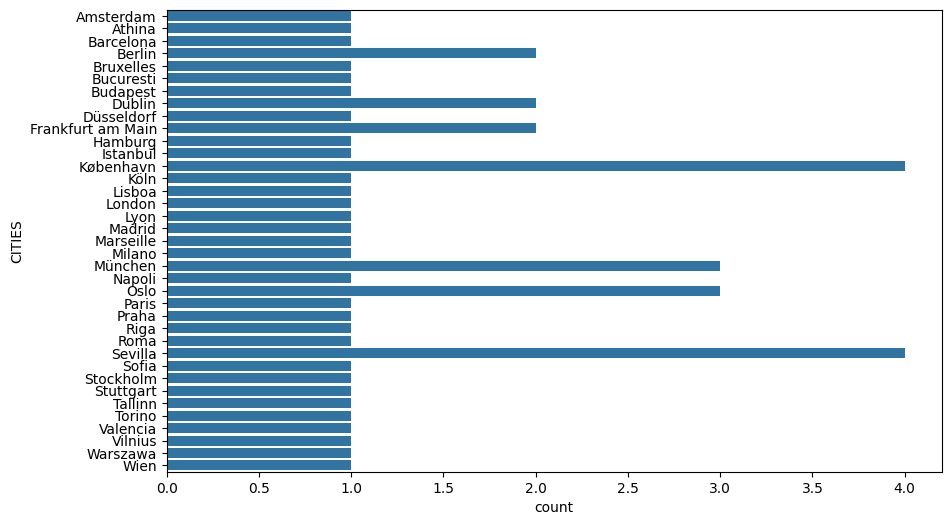

In [11]:
# univerent
# numerical
for col in dataset.select_dtypes(include=np.number):
  plt.figure(figsize=(10,6))
  sns.displot(dataset[col],bins=30, kde=True)
  plt.show()

# categorycal
for col in dataset.select_dtypes(include='object'):
  plt.figure(figsize=(10,6))
  sns.countplot(dataset[col])
  plt.show()

In [12]:
# correlation matrix
data = dataset.copy()
cat_ds = dataset.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_ds:
  dataset[col]=le.fit_transform(dataset[col].astype(str))
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  50 non-null     int64  
 1   City_Eng              50 non-null     int64  
 2   City_Short            50 non-null     int64  
 3   NAds                  50 non-null     int64  
 4   Price_Median          50 non-null     float64
 5   Price_Mean            50 non-null     float64
 6   Area_Median           50 non-null     float64
 7   Area_Mean             50 non-null     float64
 8   Room_Median           50 non-null     float64
 9   Room_Mean             50 non-null     float64
 10  Euro_area             50 non-null     int64  
 11  EU                    50 non-null     int64  
 12  Population            50 non-null     int64  
 13  City_Area             50 non-null     float64
 14  Density               50 non-null     float64
 15  GDP_PC                50 

In [13]:
dataset=dataset.drop(columns=['City','City_Short'])

29


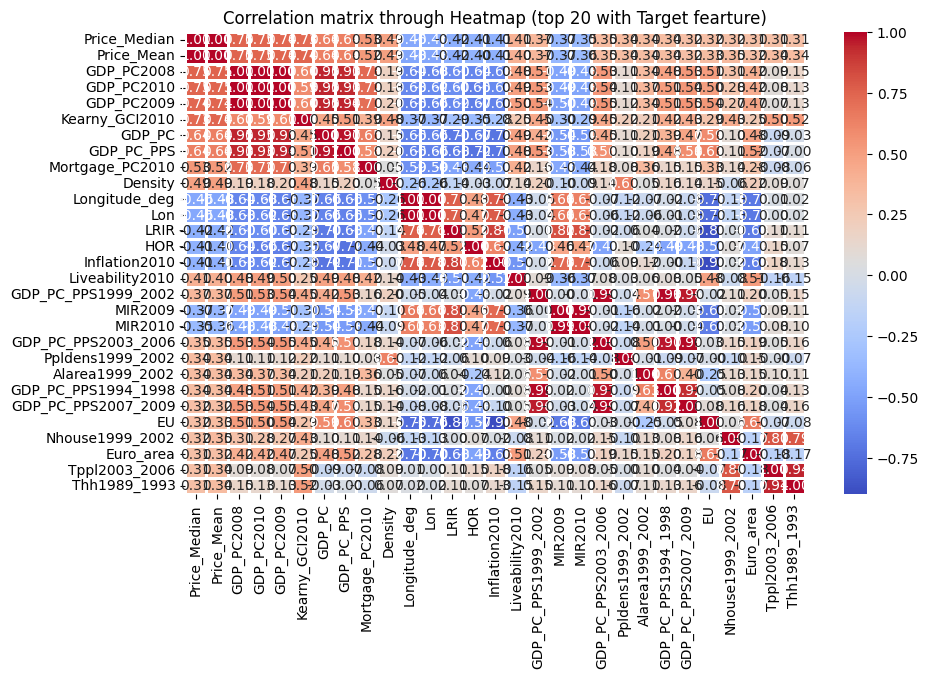

In [14]:
# correlation matrix
cr = dataset.corr()
top_corr = cr["Price_Median"].abs()[cr["Price_Median"].abs() > 0.30].sort_values(ascending=False).index
plt.figure(figsize=(10,6))
# sns.heatmap(cr,annot=True, fmt='.2f',cmap='coolwarm',linewidths=0.8)
print(len(top_corr))
sns.heatmap(dataset[top_corr].corr(),annot=True, fmt='.2f'
,cmap='coolwarm',linewidths=0.8)
plt.title('Correlation matrix through Heatmap (top 20 with Target fearture)')
plt.show()

In [15]:
most_corr = cr["Price_Median"].abs()[cr["Price_Median"].abs()>0.30].sort_values(ascending=False).index
top_corr = cr["Price_Median"].abs().sort_values(ascending=False).head(20).index
ds_1 = dataset[list(top_corr)]  # dataset of top 20 with respect price_mediam
ds_2 = dataset[list(most_corr)]  # dataset of corr > 0.3 with price_mediam

In [16]:
# drop identical columns corr score >85 for ds_1 and ds_2
corr_matrix1 = ds_1.corr().abs()
target = "Price_Median"
list_col = set()
for i in range(len(corr_matrix1.columns)):
  for j in range(i):
    if corr_matrix1.iloc[i,j] >= 0.9999:
      list_col.add(corr_matrix1.columns[i])
    elif corr_matrix1.iloc[i,j] >0.85:
      list_col.add(corr_matrix1.columns[i])
identical_col1 = [col for col in ds_1 if (col not in list_col)]
if target not in identical_col1:
  identical_col1.append(target)
print(f'ds_1 {identical_col1}')

corr_matrix = ds_2.corr().abs()
target = "Price_Median"
list_col = set()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if corr_matrix.iloc[i,j] >= 0.9999:
      list_col.add(corr_matrix.columns[i])
    elif corr_matrix.iloc[i,j] >0.85:
      list_col.add(corr_matrix.columns[i])
identical_col = [col for col in ds_2 if (col not in list_col)]
if target not in identical_col:
  identical_col.append(target)
print(f'ds_2 {identical_col}')

ds_1 ['Price_Median', 'GDP_PC2008', 'Kearny_GCI2010', 'Mortgage_PC2010', 'Density', 'Longitude_deg', 'LRIR', 'HOR', 'Liveability2010', 'GDP_PC_PPS1999_2002', 'MIR2009']
ds_2 ['Price_Median', 'GDP_PC2008', 'Kearny_GCI2010', 'Mortgage_PC2010', 'Density', 'Longitude_deg', 'LRIR', 'HOR', 'Liveability2010', 'GDP_PC_PPS1999_2002', 'MIR2009', 'Ppldens1999_2002', 'Alarea1999_2002', 'Nhouse1999_2002', 'Euro_area', 'Tppl2003_2006']


**ds_1 -> 77.33107290804934
29.67313596298239 on linear regression**

In [23]:
# check the best one out of top 20 vs corr>0.3
ds_1 = ds_1[identical_col1]
ds_2 = ds_2[identical_col]
ds_1.info()
# input and output
X1 = ds_2.drop(columns=["Price_Median"])
y1= ds_2["Price_Median"]
# train test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.25, random_state=42)
# model
lr = LinearRegression()
# score best feacture combo
fs= SequentialFeatureSelector(lr,n_features_to_select=3, direction='forward', cv=2)
fs.fit(X1_train, y1_train)
# check feactures
print(ds_1.columns)

# selected feacture
feacture = X1.columns[fs.get_support()]

lr.fit(X1_train[feacture], y1_train)

print(feacture)
# train score
print(lr.score(X1_train[feacture], y1_train)*100)
# test score
print(lr.score(X1_test[feacture], y1_test)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price_Median         50 non-null     float64
 1   GDP_PC2008           50 non-null     float64
 2   Kearny_GCI2010       50 non-null     float64
 3   Mortgage_PC2010      50 non-null     float64
 4   Density              50 non-null     float64
 5   Longitude_deg        50 non-null     int64  
 6   LRIR                 50 non-null     float64
 7   HOR                  50 non-null     float64
 8   Liveability2010      50 non-null     float64
 9   GDP_PC_PPS1999_2002  50 non-null     float64
 10  MIR2009              50 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 4.4 KB
Index(['Price_Median', 'GDP_PC2008', 'Kearny_GCI2010', 'Mortgage_PC2010',
       'Density', 'Longitude_deg', 'LRIR', 'HOR', 'Liveability2010',
       'GDP_PC_PPS1999_2002', 'MIR2009'],
      dtype

In [28]:
# check the  top 20  model result
ds_1 = ds_1[identical_col1]
ds_2 = ds_2[identical_col]
ds_2.info()
# input and output
X = ds_1.drop(columns=["Price_Median"])
y= ds_1["Price_Median"]
# train test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
# model
lr = LinearRegression()
print(X_train.shape)
best_column = None
best_score=-np.inf
# score best feacture combo
for k in range(1, X_train.shape[1]):
  fs = SequentialFeatureSelector(lr, n_features_to_select=k, direction='forward', cv=3)
  fs.fit(X_train, y_train)
  # select columns
  column = X.columns[fs.get_support()]
  # score validiation
  score = np.mean(cross_val_score(lr,X_train[column],y_train, cv=3, scoring='r2'))

  if score > best_score:
    best_score = score
    best_column = column

print(f'best feacture :{best_column.tolist()}')
print(f'best score crv :{best_score*100}')
lr.fit(X_train[best_column], y_train)
print(f'train R2 score : {lr.score(X_train[best_column], y_train)}')
print(f'test R2 score : {lr.score(X_test[best_column], y_test)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price_Median         50 non-null     float64
 1   GDP_PC2008           50 non-null     float64
 2   Kearny_GCI2010       50 non-null     float64
 3   Mortgage_PC2010      50 non-null     float64
 4   Density              50 non-null     float64
 5   Longitude_deg        50 non-null     int64  
 6   LRIR                 50 non-null     float64
 7   HOR                  50 non-null     float64
 8   Liveability2010      50 non-null     float64
 9   GDP_PC_PPS1999_2002  50 non-null     float64
 10  MIR2009              50 non-null     float64
 11  Ppldens1999_2002     50 non-null     float64
 12  Alarea1999_2002      50 non-null     float64
 13  Nhouse1999_2002      50 non-null     float64
 14  Euro_area            50 non-null     int64  
 15  Tppl2003_2006        50 non-null     float

In [29]:
# check the  corr>0.3 model result

# input and output
X = ds_2.drop(columns=["Price_Median"])
y= ds_2["Price_Median"]
# train test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
# model
lr = LinearRegression()

best_column = None
best_score=-np.inf
# score best feacture combo
for k in range(1, X_train.shape[1]):
  fs = SequentialFeatureSelector(lr, n_features_to_select=k, direction='forward', cv=3)
  fs.fit(X_train, y_train)
  # select columns
  column = X.columns[fs.get_support()]
  # score validiation
  score = np.mean(cross_val_score(lr,X_train[column],y_train, cv=3, scoring='r2'))

  if score > best_score:
    best_score = score
    best_column = column

print(f'best feacture :{best_column.tolist()}')
print(f'best score crv :{best_score*100}')
lr.fit(X_train[best_column], y_train)
print(f'train R2 score : {lr.score(X_train[best_column], y_train)}')
print(f'test R2 score : {lr.score(X_test[best_column], y_test)}')

best feacture :['GDP_PC2008', 'Kearny_GCI2010', 'Alarea1999_2002', 'Euro_area']
best score crv :56.61002729762171
train R2 score : 0.7258102590770606
test R2 score : 0.276591069063127
